'''<br>
Author: Nikhil Patil<br>
Date: 10-11-2024<br>
Last Modified by: Nikhil Patil<br>
Last Modified time: 10-11-2024 <br>
Title : Python program to creating a simple linear regression model<br>

'''

## **Step 1: Import Necessary Libraries**
#### We start by importing necessary libraries for data handling, model building, and visualization.


In [1]:
import pandas as pd  # For data handling
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## **Step 2: Load the Dataset**
#### Load the training and testing datasets.

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#### Display the first few rows of each dataset to check the data


In [3]:
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())

Training Data:
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

Testing Data:
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


## **Step 3: Separate Features and Labels**
#### Separate the independent variable (x) and the dependent variable (y).

In [4]:
X_train = train_data[['x']]  # Using double brackets to keep it in DataFrame format
y_train = train_data['y']

X_test = test_data[['x']]
y_test = test_data['y']

## **Step 4: Handling Missing Values**

#### Check for Missing Values in y_train

In [5]:
print(y_train.isnull().sum())
print(X_train.isnull().sum())


1
x    0
dtype: int64


#### Remove or Fill Missing Values

##### Remove Rows with NaN

In [6]:
X_train = X_train[y_train.notnull()]
y_train = y_train[y_train.notnull()]


##### Fill Missing Values:

In [7]:
y_train.fillna(y_train.mean(), inplace=True)


## **Step 5: Visualize the Training Data**
#### Plot the training data to see the relationship between x and y.

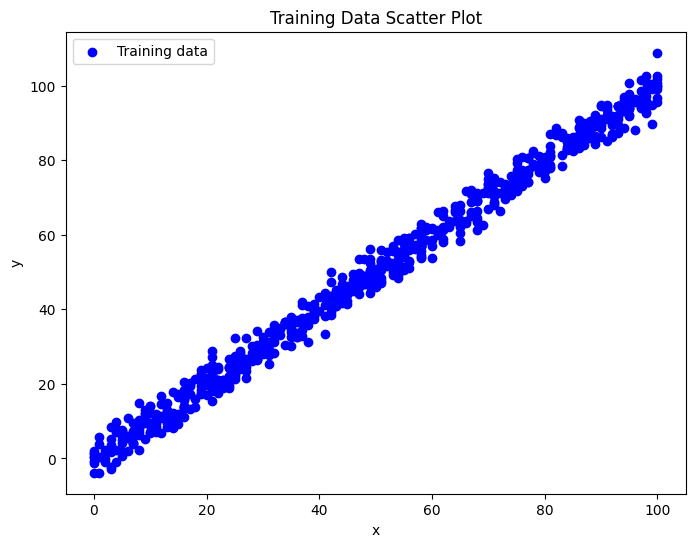

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.title("Training Data Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## **Step 6: Build and Train the Linear Regression Model**
#### Now we create an instance of the LinearRegression model and fit it to the training data.

In [9]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")


Model Coefficient: 1.0006563818563035
Model Intercept: -0.10726546430095141


## **Step 7: Make Predictions on Test Data**
#### Use the trained model to predict values for the test set.

In [10]:
# Predicting the values on the test data
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predicted values on test data:", y_pred[:5])


Predicted values on test data: [76.94327594 20.90651855 21.90717494 19.90586217 35.91636428]


## **Step 8: Evaluate the Model**
#### Calculate the model's performance using Mean Squared Error (MSE) and R-squared (R²).

In [11]:
# Calculating Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 9.432922192039317
R-squared: 0.9888014444327563


## **Step 9: Visualize the Model on Test Data**
#### Plot the linear regression line along with the test data to visualize how well the model fits.

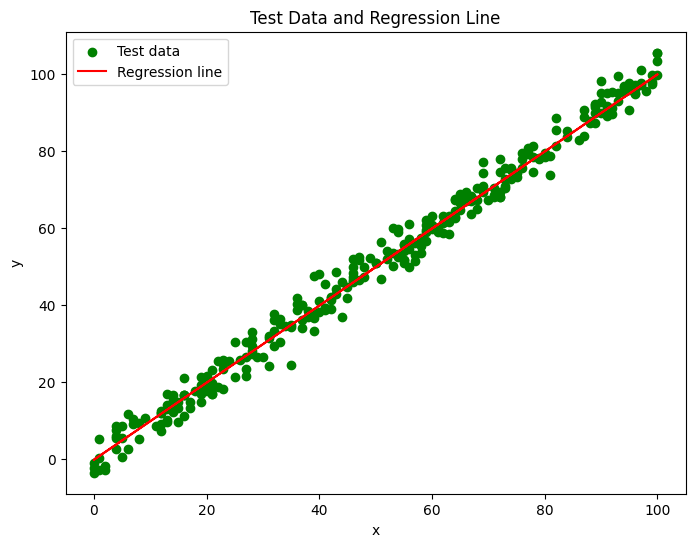

In [12]:
# Plotting the regression line with test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title("Test Data and Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
